# #Internship Project For the Sparks Foundation - By : Ashwini Wanve


# Exploratory Data analysis : Sports 

### Step 1: Import the data 

In [12]:
pip install pandas==0.22

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
df_matches=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')
df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 and 2019.

### Step 2: Clean the data

In [25]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
#Observations from Describe()Is as below :
#1. The .csv file has data of IPL matches starting from the season 2008 to 2019.
#2.The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
#3.The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
#4.There were 756 IPL matches hosted from 2008 to 2019

Let’s view the unique values of each column to help us understand the dataset better.

In [14]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [20]:
print(df_matches['season'].unique())
print(df_matches['city'].unique())
print(df_matches['venue'].unique())

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance 

In [137]:
#It’s imperative to know the count of NaN values for each column before we proceed further.
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [138]:
#The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. 
df_matches=df_matches.drop(columns=['umpire3'])

df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [11]:
df_matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

# # # Step 3:Process and Visualise the data
Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.

In [8]:
#importing the libraries to manipulate and visualize data
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
#Some Basic Analysis
print('Total Matches Played:',df_matches.shape[0])
print(' \n Venues Played At:',df_matches['city'].unique())     
print(' \n Teams :',df_matches['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [15]:
print('Total venues played at:',df_matches['city'].nunique())
print('\nTotal umpires ',df_matches['umpire1'].nunique())

Total venues played at: 32

Total umpires  61


In [140]:
print((df_matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((df_matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
Mumbai Indians : has the highest number of match wins


In [141]:
print(" team win by maximum runs")
df=df_matches.iloc[[df_matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

 team win by maximum runs


,season,team1,team2,winner,win_by_runs
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146


In [142]:
#Let’s analyze the team with the most wins in each season.
teams_per_season = df_matches.groupby('season')['winner'].value_counts()
teams_per_season



season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [143]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1 

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [131]:
win_per_season_df

,year,team,wins
0,2008,RR,13
0,2009,DD,10
0,2010,MI,11
0,2011,CSK,11
0,2012,KKR,12
0,2013,MI,13
0,2014,KXIP,12
0,2015,CSK,10
0,2016,SRH,11
0,2017,MI,12


# 1. Most winning Team

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='wins'>

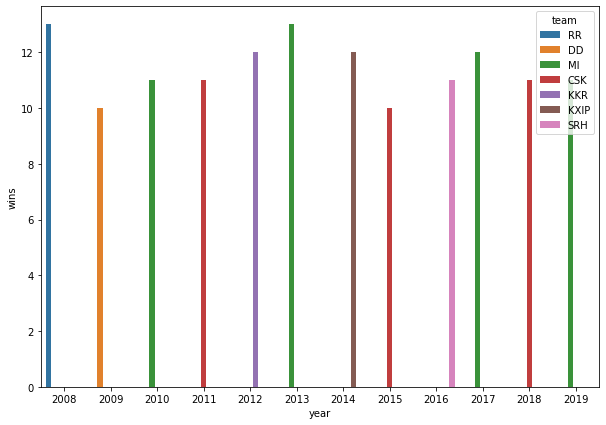

In [132]:
#The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot('year','wins', hue='team', data=win_per_season_df,ax=ax)

In [ ]:
#Observations:
#Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

# 2. The venue that hosted the maximum number of matches

In [64]:
venue_series=df_matches['venue'].value_counts()


In [65]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_series.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

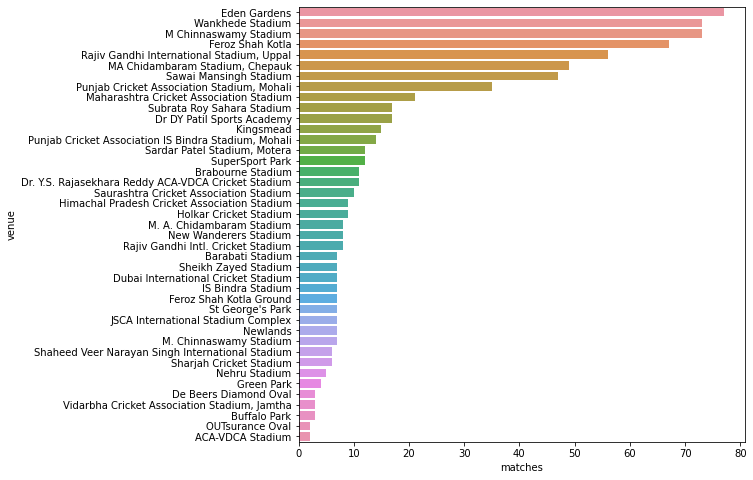

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='matches', y='venue', data=venue_df);

In [ ]:
#Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
#Till 2019, IPL matches were hosted by 40 venues.

# 3. Toss Decisions across Seasons

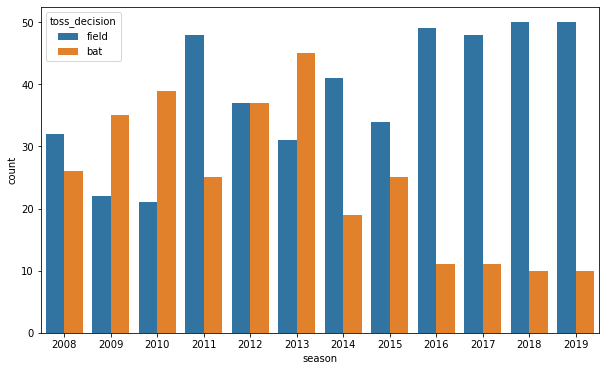

In [79]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=df_matches)
plt.show()

In [ ]:
#The decision for batting or fielding varies largely across the seasons. 
#In some seasons, the probability that toss winners opt for batting is high, while it is not the case in other seasons.
#In 2016 though, the majority of toss winners opted for batting.

# Maximum Toss Winners

In [153]:
win_team=df_matches['toss_winner'].value_counts()
win_team



Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

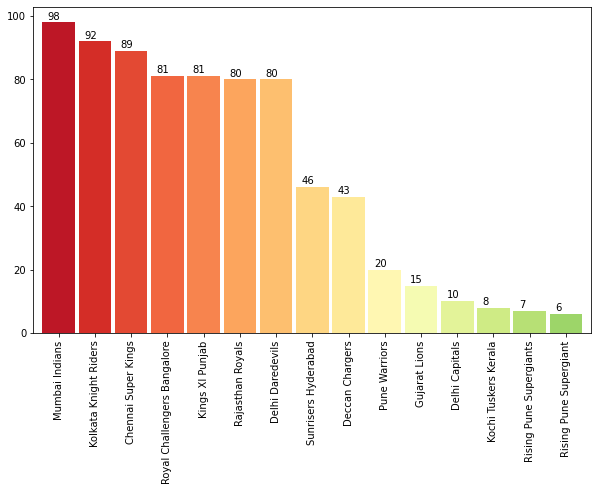

In [144]:
plt.subplots(figsize=(10,6))
ax=df_matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [ ]:
# Mumbai Indians seem to be very lucky having the higest win in tosses follwed by Kolkata Knight Riders. 
#Pune Supergiants have the lowest wins as they have played the lowest matches also.

#This does not show the higher chances of winning the toss as the number of matches played by each team is uneven.

#  Is Toss Winner Also the Match Winner?

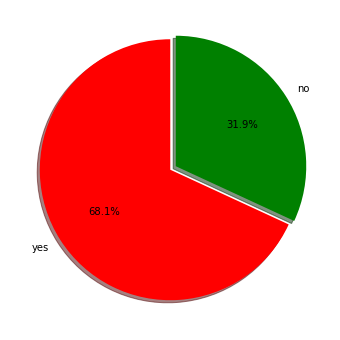

In [115]:
df=df_matches[df_matches['toss_winner']==df_matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
#Thus the toss winner is not necessarily the match winner. 
#The match winning probability for toss winnong team is about 50%-50%.

# The most successful IPL team

In [116]:
team_wins =df_matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


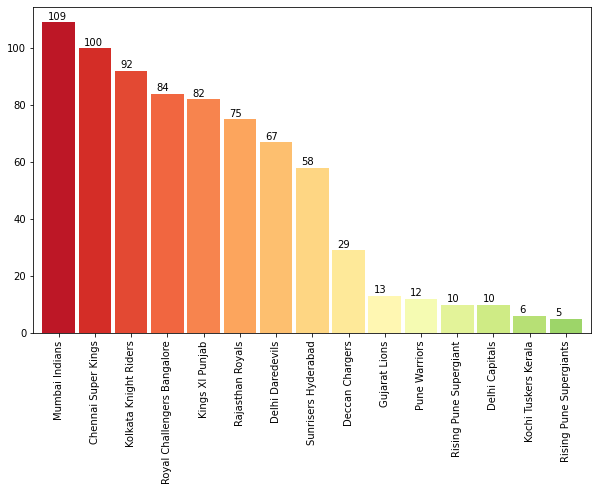

In [155]:
#plt.subplots(figsize=(20,6))

#sns.barplot(team_wins_df['wins'],team_wins_df['team'])

plt.subplots(figsize=(10,6))
ax=df_matches['winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [ ]:
#Observations:
#Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) 
#followed by Chennai Super Kings and Kolkata Knight Riders.

# Matches played across each season

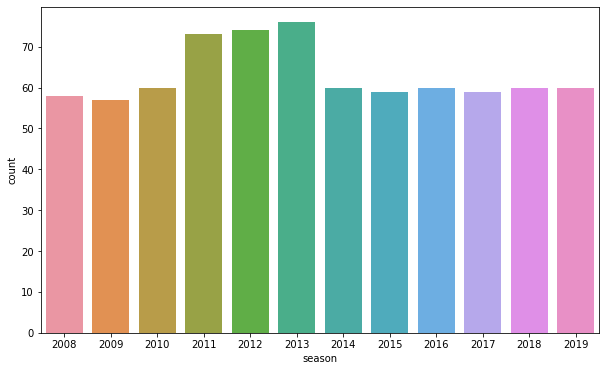

In [157]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=df_matches)  #countplot automatically counts the frequency of an item
plt.show()

In [ ]:
#As we can see in the graph there is maximum number of matches played the year 2013

# Runs Across the Seasons

In [4]:
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
Batting_Data = df_matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=Batting_Data.groupby(['season'])['total_runs'].sum().reset_index()
season

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


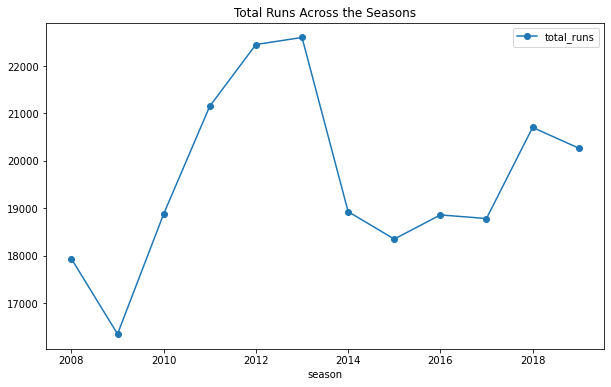

In [10]:
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

In [ ]:
#There was a decline in total runs from 2008 to 2009. But there after there was a substantial increase in runs in every season until 2013,
#but from next season there was a slump in the total runs
#But the number of matches are not equal in all seasons.

#  We should check the average runs per match in each season:

In [19]:
avgruns_each_season=df_matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season

,season,matches,total_runs
0,2008,58,17937
1,2009,57,16353
2,2010,60,18883
3,2011,73,21154
4,2012,74,22453
5,2013,76,22602
6,2014,60,18931
7,2015,59,18353
8,2016,60,18862
9,2017,59,18786


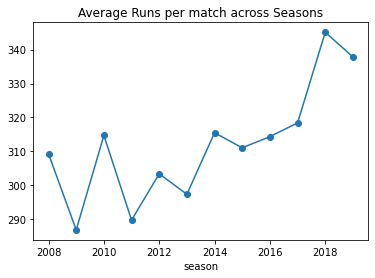

In [20]:
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.title('Average Runs per match across Seasons')
plt.show()

# Sixes and Fours Across the Season

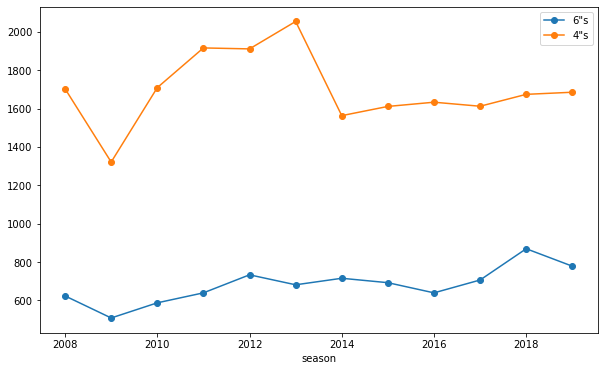

In [23]:
Season_boundaries=Batting_Data.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


# Maximum Man Of Matches

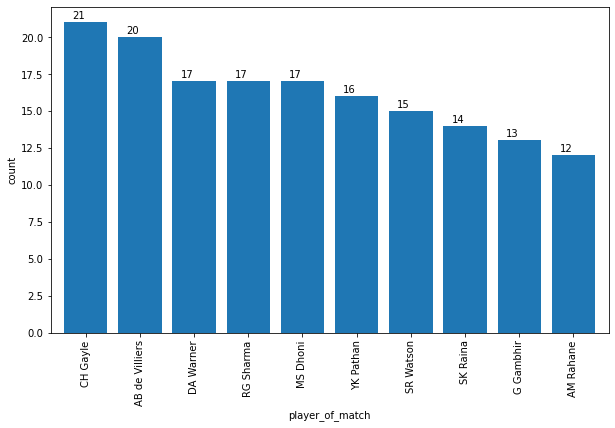

In [30]:
plt.subplots(figsize=(10,6))

ax = df_matches['player_of_match'].value_counts().head(10).plot.bar(width=.8)  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

# Top 10 Batsman

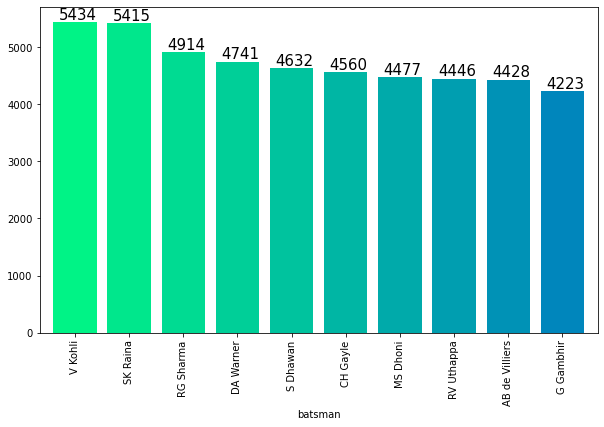

In [31]:
plt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

# Top Batsman’s with 1’s, 2’s, 3’s, 4’s

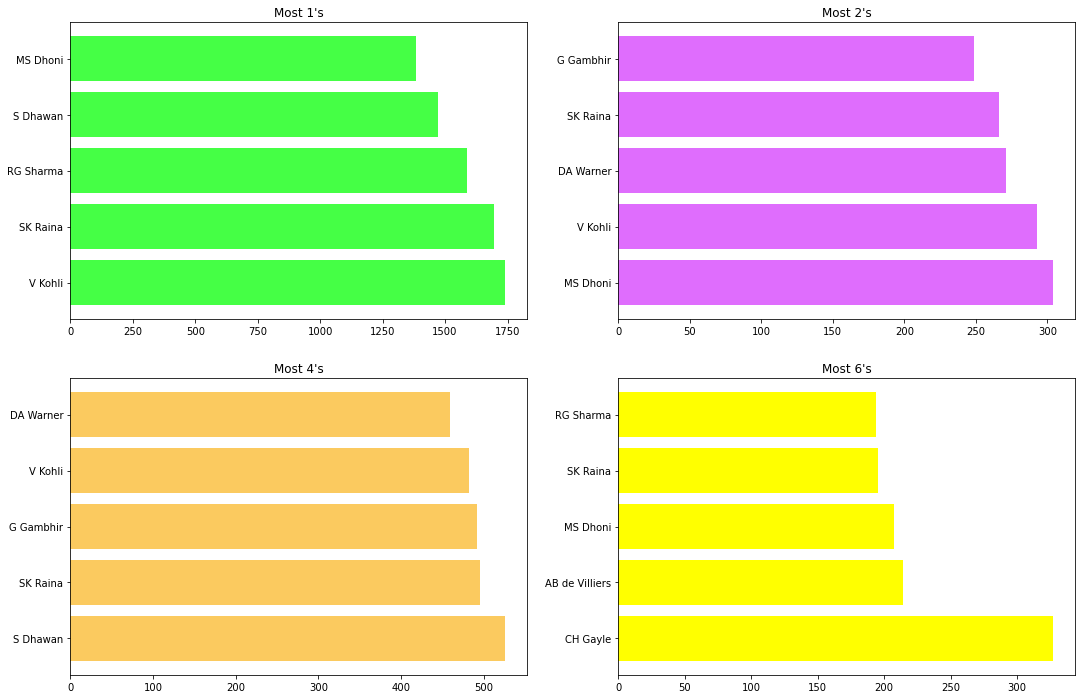

In [32]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

In [ ]:
#Observations:

#Kohli has scored the maximum 1’s
#Dhoni has the maximum 2’s . Those Strong Legs :p
#Gambhir has the maximum 4’s.
#C Gayle has the maximum 6’s and he leads by a big margin.

# Top Individual Scores

In [33]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


#  Individual Scores By Top Batsman each Inning

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.0% of the points

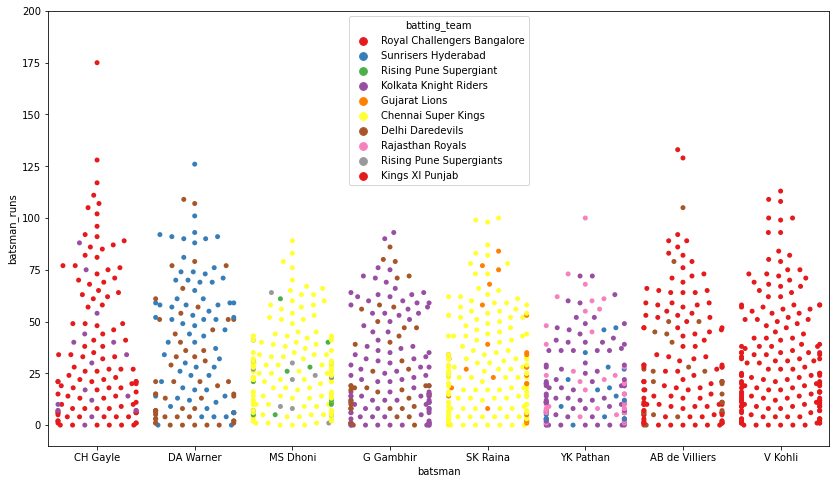

In [35]:

swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()

# Runs Scored By Batsman Across Seasons

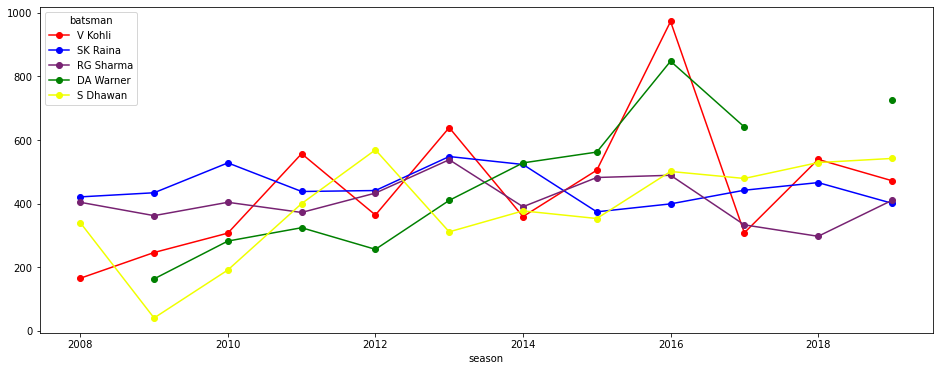

In [36]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

In [ ]:
#David Warner’s form looks to be improving season by season.
#There has been a sharp decline in Kohli’s Runs in the last season.

# Which umpire has officiated the most number of IPL matches on-field?

In [38]:
umpire1_ser = df_matches['umpire1'].value_counts()
umpire2_ser = df_matches['umpire2'].value_counts()
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Subroto Das,NaN,1.0


In [40]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 
umpire_df

,umpire,matches
0,HDPK Dharmasena,87.0
1,Asad Rauf,51.0
2,S Ravi,106.0
3,AK Chaudhary,58.0
4,Aleem Dar,38.0
...,...,...
70,K Srinivasan,3.0
71,KN Anantapadmanabhan,3.0
72,SD Ranade,2.0
73,Subroto Das,1.0


In [41]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
12,C Shamshuddin,73.0
3,AK Chaudhary,58.0
57,SJA Taufel,55.0


# What are the major victories in IPL? Is it better to defend or chase in IPL?

In [42]:
len(df_matches)
defend_vict_ser = df_matches['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
105      1
87       1
42       1
93       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [ ]:
#Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target.
#Hence, more victories were registered by teams chasing a total(batting second) than defending the total.
#When defending a total, the biggest victory was by 146 runs. Let’s find out that particular match.

In [44]:
score = 146
for index, row in df_matches.iterrows():
    if(row['win_by_runs'] == score):
        print(row)

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [ ]:
#The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs 
#on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.

In [45]:
chasing_vict_ser =df_matches['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

In [ ]:
#Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.
#When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). 
#There were 11 such instances and we can find the details about those matches by the following code snippet

In [47]:
for index, row in df_matches.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [48]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


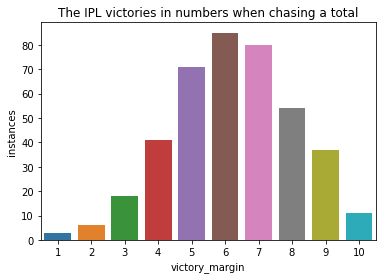

In [49]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2)